In [22]:
import pandas as pd
import numpy as np

In [23]:
GC_df = pd.read_csv(r"../util/data/FY2019/structured/original/GuilfordCountyOriginalDataFY19.csv")
GC_df.drop(['Unnamed: 0'], axis=1,inplace=True)
GC_df['label']='0'
GC_df.shape
GC_df.head(5)

,page_number,word,label
0,1,fy,0
1,1,adopted,0
2,1,budget,0
3,1,july,0
4,1,june,0


In [24]:
CC_df = pd.read_csv(r"../util/data/FY2019/structured/original/CharlotteCityOriginalDataFY19.csv")
CC_df.drop(['Unnamed: 0'], axis=1,inplace=True)
CC_df['label']='1'
CC_df.head(5)

,page_number,word,label
0,1,ensuring,1
1,1,an,1
2,1,equitable,1
3,1,sustainable,1
4,1,and,1


In [25]:
RC_df = pd.read_csv(r"../util/data/FY2019/structured/original/RaleighCityOriginalDataFY19.csv")
RC_df.drop(['Unnamed: 0'], axis=1,inplace=True)
RC_df['label']='2'
RC_df.shape

(54874, 3)

In [26]:
DC_df = pd.read_csv(r"../util/data/FY2019/structured/original/DurhamCityOriginalDataFY19.csv")
DC_df.drop(['Unnamed: 0'], axis=1,inplace=True)
DC_df['label']='3'
DC_df.shape

(76838, 3)

In [27]:
DCNT_df = pd.read_csv(r"../util/data/FY2019/structured/original/DurhamCountyOriginalDataFY19.csv")
DCNT_df.drop(['Unnamed: 0'], axis=1,inplace=True)
DCNT_df['label']='4'
DCNT_df.shape

(111972, 3)

In [28]:
MC_df = pd.read_csv(r"../util/data/FY2019/structured/original/MecklenburgCountyOriginalDataFY19.csv")
MC_df.drop(['Unnamed: 0'], axis=1,inplace=True)
MC_df['label']='5'
MC_df.shape

(26457, 3)

In [29]:
WC_df = pd.read_csv(r"../util/data/FY2019/structured/original/WakeCountyOriginalDataFY19.csv")
WC_df.drop(['Unnamed: 0'], axis=1,inplace=True)
WC_df['label']='6'
WC_df.shape

(127675, 3)

In [9]:
Combined_df = pd.concat([GC_df, CC_df, RC_df, DC_df, DCNT_df, MC_df, WC_df])

In [30]:
import pandas as pd
import nltk
import spacy
import gensim
import seaborn as sb
from gensim import corpora, models, similarities
from spacy.lang.en import English
from nltk.corpus import wordnet as wn

In [31]:
import re

#importing all the gensim models that i could find.
from gensim import corpora
from gensim import models
from gensim.parsing import preprocessing
from gensim.models import ldamodel

In [33]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [36]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = Combined_df.word.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

[['fy']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [17]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [18]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           passes=10,
                                           alpha = 'auto',
                                           eta = 'auto',
                                           random_state = 1)

pprint(lda_model.print_topics())

[(0,
  '0.315*"total" + 0.056*"commissioner" + 0.052*"park" + 0.051*"property" + '
  '0.044*"security" + 0.044*"resource" + 0.035*"policy" + 0.032*"economic" + '
  '0.027*"performance" + 0.026*"amend"'),
 (1,
  '0.196*"program" + 0.153*"provide" + 0.106*"major" + 0.064*"grant" + '
  '0.063*"exist" + 0.053*"operation" + 0.039*"information" + 0.037*"change" + '
  '0.035*"work" + 0.034*"care"'),
 (2,
  '0.115*"fund" + 0.110*"summary" + 0.108*"fire" + 0.078*"area" + '
  '0.062*"current" + 0.060*"solid" + 0.048*"state" + 0.041*"level" + '
  '0.040*"percent" + 0.039*"estimate"'),
 (3,
  '0.187*"fiscal" + 0.086*"debt" + 0.074*"unit" + 0.068*"water" + '
  '0.060*"infrastructure" + 0.050*"issue" + 0.044*"goal" + 0.042*"remain" + '
  '0.042*"government" + 0.041*"base"'),
 (4,
  '0.206*"adopt" + 0.107*"replacement" + 0.090*"support" + 0.083*"increase" + '
  '0.075*"number" + 0.044*"charge" + 0.041*"planning" + 0.038*"additional" + '
  '0.038*"require" + 0.038*"site"'),
 (5,
  '0.219*"capital" + 0

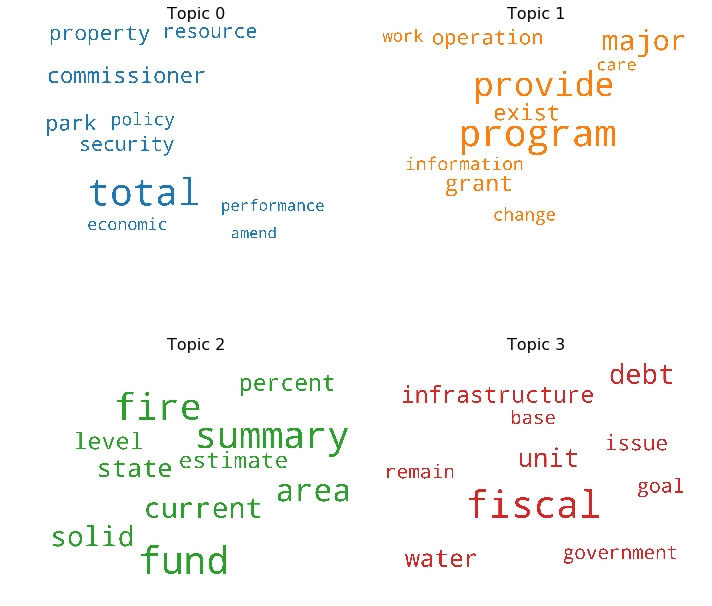

In [20]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()
